# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** Kacper Pastuła

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


(-10.0, 10.0)

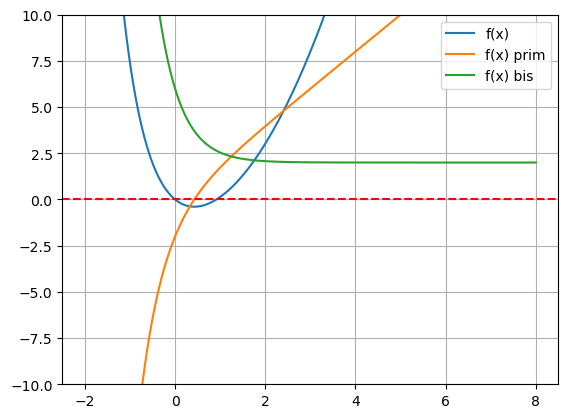

In [2]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-2, 8, 1000)
y = main.func(x)
dy = main.dfunc(x)
d2y = main.ddfunc(x)
plt.plot(x,y)

plt.plot(x,dy)

plt.plot(x,d2y)
plt.legend(['f(x)','f(x) prim','f(x) bis'])
plt.axhline(y = 0, color = 'r',linestyle='--')
plt.grid()
plt.ylim([-10,10])



***Do zadania 1***
W pierwszym zadaniu należało wyrysować wykresy danej funkcji, oraz jej pierwszej i drugiej pochodnej w taki sposób aby dało się określić miejsca zerowe funkcji. Następnie należało określić przedziały, w których f ma miejsca zerowe. Do stworzenia wykresu posłużyłem sie wiedzą z poprzednich zajęć.

Jak widać na wykresie funkcja f ma jedno miejsce zerowe w przedziale [-0.1, 0.1] i drugie w przedziale [0.8, 1.2].
Wykresy pochodnych funkcji mogą dać nam popowiedzi odnośnie miejsc zerowych - miejsce zerowe może być w okolicy miejsca w którym zeruje się pierwsza pochodna, lub tam gdzie druga pochodna zmienia znak. Są to jednak jedynie podpowiedzi, a nie wymagane kryteria.

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

(1.1, 1)


Text(0.5, 1.0, 'Dokładność wyniku a liczba iteracji w przypadku metody bisekcji dla funkcji z sekcji cel zajęć i przedziału (0.2, 2)')

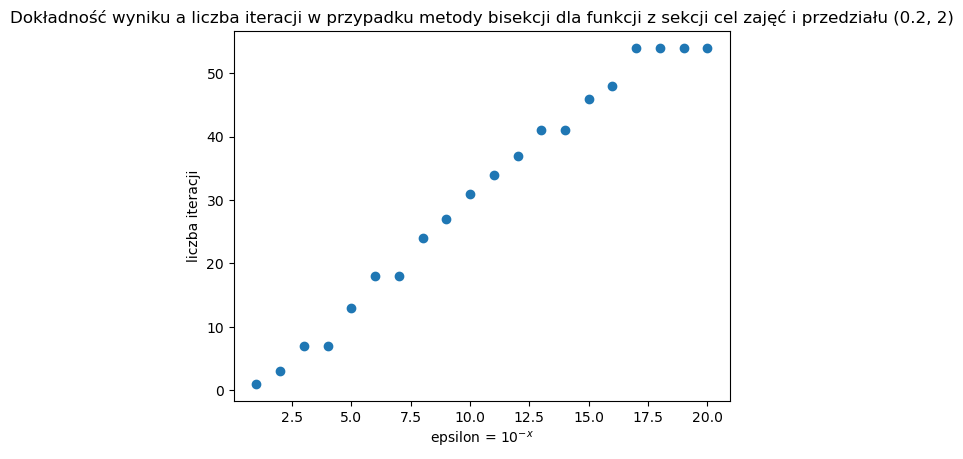

In [8]:
print(main.bisection(0.2,2,main.func,epsilon = 1e-12,max_iter = 1))
data = []
for i in range(20):
    data.append(main.bisection(0.2,2,main.func,epsilon = 10**(-i),max_iter = 100)[1])
plt.scatter(np.linspace(1,20,20),data)
plt.ylabel('liczba iteracji')
plt.xlabel('epsilon = $10^{-x}$')
plt.title("Dokładność wyniku a liczba iteracji w przypadku metody bisekcji dla funkcji z sekcji cel zajęć i przedziału (0.2, 2)")

***Do zadania 2***
W drugim zadaniu należało zaimplementować najprostszą metodę znajdowania miejsca zerowego funkcji na zadanym przedziale, czyli metodę bisekcji. Ta metoda polega zmniejszaniu w pętli zadanego przedziału, w którym wiemy że jest miejsce zerowe i sprawdzaniu czy jesteśmy już zadowoleni z wyniku, jeżeli tak to go zwracamy. W implementacji z tego zadania dodatkowo sprawdzamy ile iteracji wykonaliśmy i tą liczbę również wracamy.

**Wnioski:** Metoda bisekcji jest najprsotsza, ale nie najlepsza. Wymaga ona więcej iteracji aby uzyskać dobrą dokładność niż inne metody znajowania pierwiastków. Skuteczność tej metody również mocno zależy od funkcji dla której szukamy pierwiastków oraz od przedziału który zastosujemy.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


(np.float64(0.9165625828633664), 13)
-0.068648139101955


Text(0.5, 1.0, 'Dokładność wyniku a liczba iteracji w przypadku metody siecznych\n dla funkcji z sekcji cel zajęć i przedziały (0.2,2)')

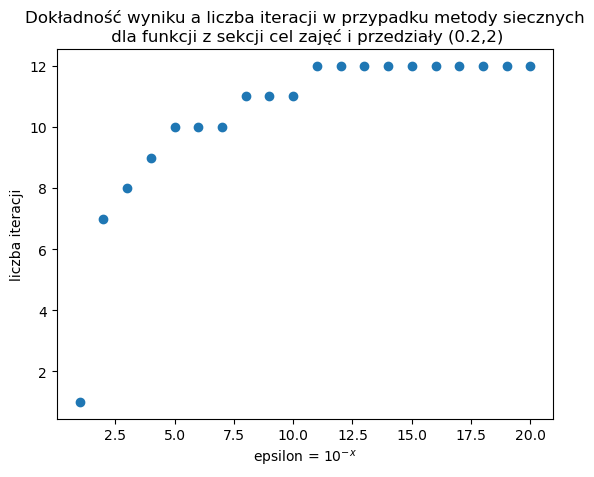

In [4]:
print(main.secant(0.1,1.5,main.func,epsilon=1e-07,max_iters=100))
print(main.func(0.8692301137267205))
data = []
for i in range(20):
    data.append(main.secant(0.2,2,main.func,epsilon = 10**(-i),max_iters = 100)[1])
plt.scatter(np.linspace(1,20,20),data)
plt.ylabel('liczba iteracji')
plt.xlabel('epsilon = $10^{-x}$')
plt.title("Dokładność wyniku a liczba iteracji w przypadku metody siecznych\n dla funkcji z sekcji cel zajęć i przedziały (0.2,2)")


***Do zadania 3***
Kolejna metodą znajdowania miejsc zerowych funkcji nieliniowej jest metoda siecznych. Metoda siecznych jest przybliżeniem metody Newtona, ale eliminuje potrzebę obliczania pochodnej funkcji. W metodzie Newtona kolejne przybliżenie obliczane jest przy użyciu stycznej, metoda siecznych zastępuje pochodną ilorazem różnicowym, któy jest nachyleniem siecznej przechodzącej przez dwa punkty ( w naszym przypadku a i b). Kolejnym przybliżeniem w pętli jest punkt przecięcia osi X przez sieczną poprowadzoną przez punkty (a, f(a)) i (b, f(b)).

**Wnioski:** Metoda siecznych jest wyraźnie szybsza od metody bisekcji, tutaj do granicznej dokładności dochodzimy już po 12 iteracjach. jej wadą jest to, że musimy spełnić więcej warunków aby metoda była zbieżna.

---


### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

(np.float64(-9.191619259508066e-11), 5)


Text(0.5, 1.0, 'Dokładność wyniku a liczba iteracji w przypadku metody Newtona\n dla funkcji z sekcji cel zajęć i przedziały (0.2,2)')

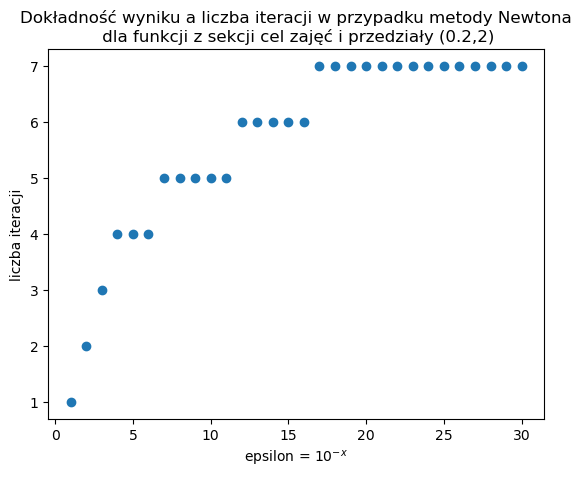

In [5]:
print(main.newton(main.func,main.dfunc,main.ddfunc,-0.5,0.5,epsilon=1e-8,max_iter=50))
data = []
for i in range(30):
    data.append(main.newton(main.func,main.dfunc,main.ddfunc,0.2,2,epsilon = 10**(-i),max_iter = 100)[1])
plt.scatter(np.linspace(1,30,30),data)
plt.ylabel('liczba iteracji')
plt.xlabel('epsilon = $10^{-x}$')
plt.title("Dokładność wyniku a liczba iteracji w przypadku metody Newtona\n dla funkcji z sekcji cel zajęć i przedziały (0.2,2)")


---

***Do zadania 4***
Trzecią metodą znajdowania pierwiastków funkcji nieliniowych jest metoda Newtona. Metoda Newtona to jedna z najszybciej zbieżnych metod, ale wymaga ona znajomości pochodnej funkcji. Metoda Newtona posługuje się stycznymi do funkcji w zadanym punkcie. Następne przybliżenie jest punktem, w którym styczna przecina oś X, ten punkt jest zwykle znacznie bliżej pierwiastka niż zadany punkt początkowy. 

**Wnioski:** Jak widać na wykresie powyżej metoda Newtona jest najszybszą z trzech poznanych na zajęciach metod. Jej wadą jest to, że aby ją zastosować musimy znać wartość pochodnej funkcji, co w niektórych przypadkach może być problematyczne, w przypadku tej metody mamy róznież dużo założeń, które musimy spełnić aby mieć zbieżność.

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

[0.91656258]
[-2.50688125e-17]
[0.]
[0.91656258]
[-2.50688125e-17]
[0.]
 message: The solution converged.
 success: True
  status: 1
     fun: [ 8.882e-16]
       x: [ 9.166e-01]
  method: hybr
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-1.513e+00]
     qtf: [-7.066e-10]


Text(0, 0.5, 'wyznaczony przez funkcje root() i fsolve()\n pierwiastek zadanej funkcji')

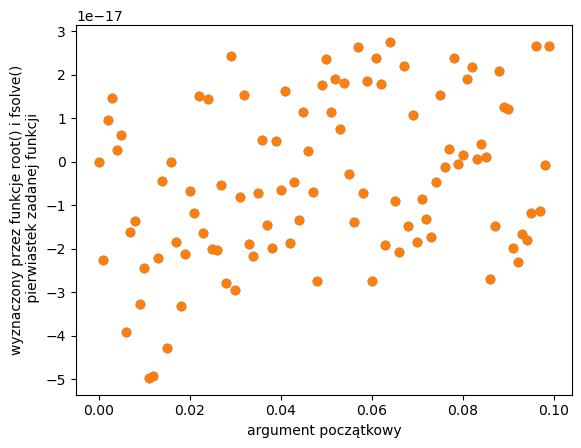

In [6]:
# ===== Twoja implementacja tutaj =====
print(sp.optimize.root(main.func,1).x)
print(sp.optimize.root(main.func,0.1).x)
print(sp.optimize.root(main.func,0).x)
print(sp.optimize.fsolve(main.func,1))
print(sp.optimize.fsolve(main.func,0.1))
print(sp.optimize.fsolve(main.func,0))
print(sp.optimize.root(main.func,1))
data_fsolve = []
data_root = []
x = []
for i in range(100):
    data_fsolve.append(sp.optimize.fsolve(main.func,i/1000))
    data_root.append(sp.optimize.root(main.func,i/1000).x)
    x.append(i/1000)
plt.scatter(x,data_fsolve)
plt.scatter(x,data_root)
plt.xlabel("argument początkowy")
plt.ylabel("wyznaczony przez funkcje root() i fsolve()\n pierwiastek zadanej funkcji")



***Do zadania 5***
W tym zadaniu poznajemy dwie funkcjie do znajdowania pieriwastków funkcji nieliniowych z biblioteki SciPy, czyli *sp.optimize.root()* oraz *sp.optimize.fsolve()*.Jako argument funkcji w obu przypadkach musimy podać funkcję, dla której szukamy miejsa zerowego i punkt, w którego okolicy podejrzewamy, że jest meijse zerowe.Funkcja *sp.optimize.root()* domyślnie zwraca cały opis jej przebiegu - czy była zbieżność i wiele więcej danych. Możemy skożystać z gettera .x i wtedy zwróci ona tylko wartość pierwiastka.

**Wnioski:** Jak widać funkcje zwracają te same wartości dla tych samych argumentów początkowych. Obie funkcje dają bardzo dobre przybliżenie, jednak nie są pozbawione błędu i jak widać na wykresie powyżej dokładność wydaje się losowa i jest dokładnie taka sama dla obu funkcji.

---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Text(0.5, 0.98, 'Czas i dokładność trzech metod dla drugiego miejsca zerowego')

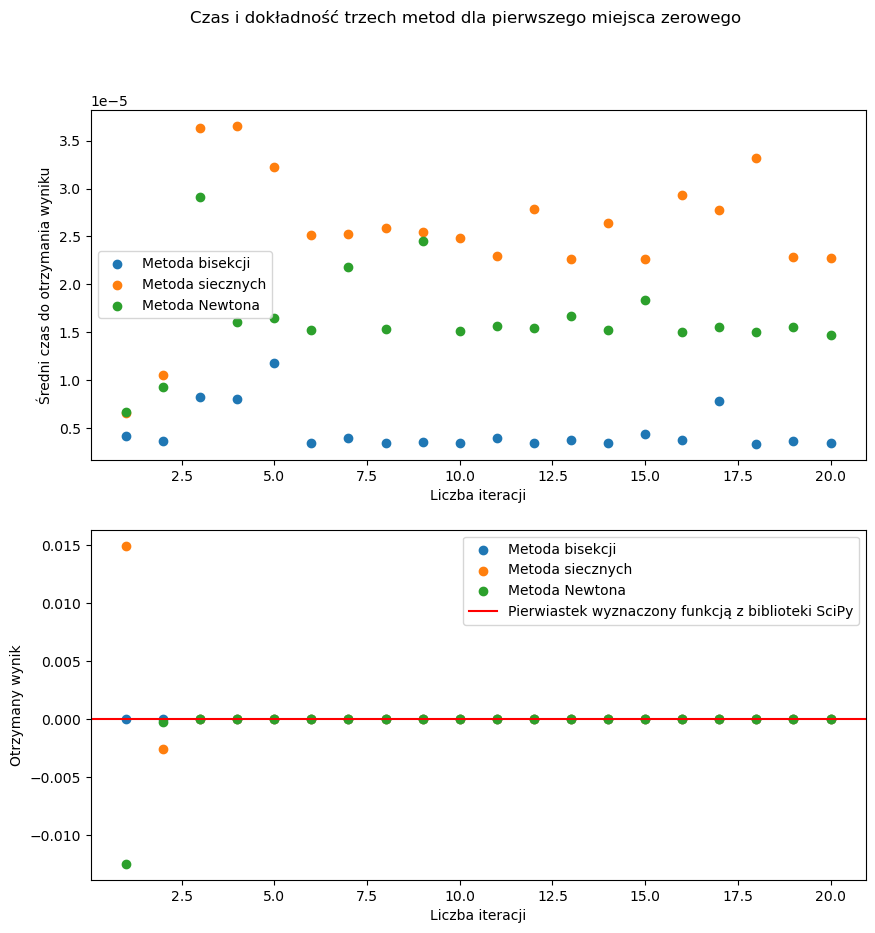

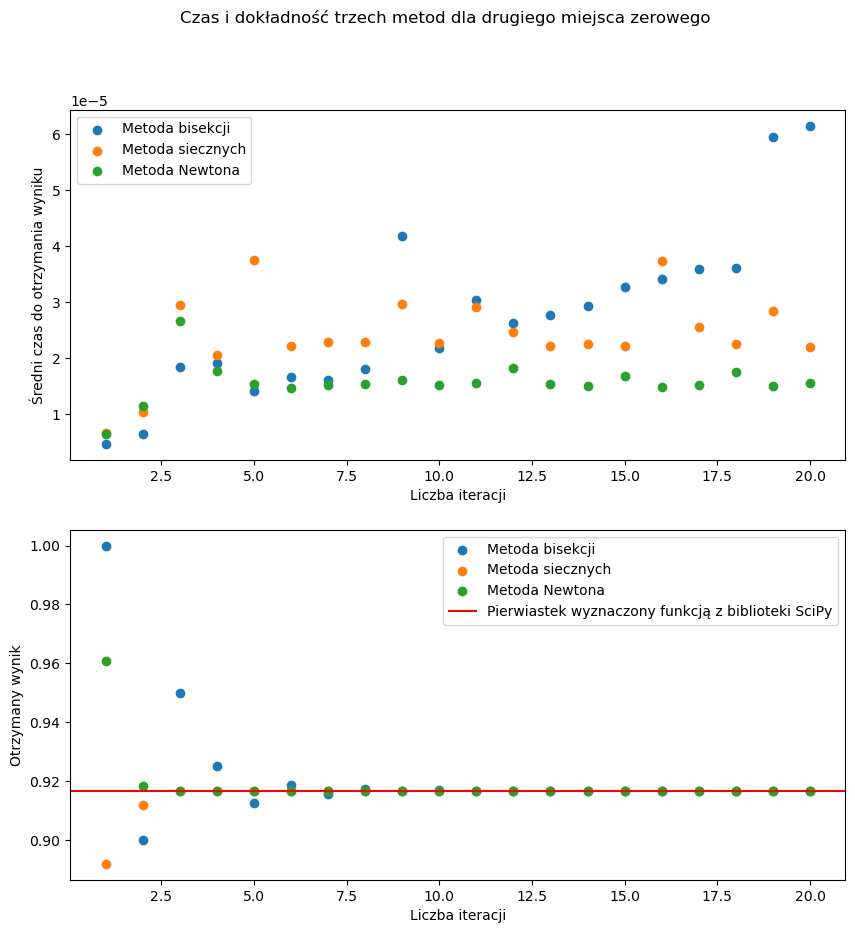

In [33]:
# ===== Twoja implementacja tutaj =====
a1, a2 = -0.1, 0.8
b1, b2 = 0.1, 1.2
eps = 1e-10
data_bisec1  = []
data_secant1 = []
data_newton1 = []
time_bisec1 = []
time_secant1 = []
time_newton1 = []
data_bisec2  = []
data_secant2 = []
data_newton2 = []
time_bisec2 = []
time_secant2 = []
time_newton2 = []
x = []
root1 = sp.optimize.root(main.func,a1).x
root2 = sp.optimize.root(main.func,a2).x
for i in range(1,21):
    data_bisec1.append(main.bisection(a1,b1,main.func,epsilon=eps,max_iter=i)[0])
    data_bisec2.append(main.bisection(a2,b2,main.func,eps,max_iter=i)[0])
    data_secant1.append(main.secant(a1,b1,main.func,eps,max_iters=i)[0])
    data_secant2.append(main.secant(a2,b2,main.func,eps,max_iters=i)[0])
    data_newton1.append(main.newton(main.func,main.dfunc,main.ddfunc,a1,b1,eps,max_iter=i)[0])
    data_newton2.append(main.newton(main.func,main.dfunc,main.ddfunc,a2,b2,eps,max_iter=i)[0])
    x.append(i)
    #czas
    time = %timeit -r 5 -n 10 -q -o main.bisection(a1,b1,main.func,eps,i)
    time_bisec1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o main.bisection(a2,b2,main.func,eps,i)
    time_bisec2.append(time.average)
    time = %timeit -r 5 -n 10 -q -o main.secant(a1,b1,main.func,eps,i)
    time_secant1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o main.secant(a2,b2,main.func,eps,i)
    time_secant2.append(time.average)
    time = %timeit -r 5 -n 10 -q -o main.newton(main.func,main.dfunc,main.ddfunc,a2,b2,eps,i)
    time_newton1.append(time.average)
    time = %timeit -r 5 -n 10 -q -o main.newton(main.func,main.dfunc,main.ddfunc,a1,b1,eps,i)
    time_newton2.append(time.average)
#wykresy
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].scatter(x,time_bisec1, label = 'Metoda bisekcji')
ax[0].scatter(x,time_secant1, label='Metoda siecznych')
ax[0].scatter(x,time_newton1, label="Metoda Newtona")
ax[0].legend()
ax[0].set(xlabel='Liczba iteracji',ylabel='Średni czas do otrzymania wyniku')
ax[1].scatter(x,data_bisec1, label = 'Metoda bisekcji')
ax[1].scatter(x,data_secant1, label='Metoda siecznych')
ax[1].scatter(x,data_newton1, label="Metoda Newtona")
ax[1].axhline(root1,color='r',label="Pierwiastek wyznaczony funkcją z biblioteki SciPy")
ax[1].legend()
ax[1].set(xlabel='Liczba iteracji',ylabel='Otrzymany wynik')
fig.suptitle("Czas i dokładność trzech metod dla pierwszego miejsca zerowego")

fig, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].scatter(x,time_bisec2, label = 'Metoda bisekcji')
ax[0].scatter(x,time_secant2, label='Metoda siecznych')
ax[0].scatter(x,time_newton2, label="Metoda Newtona")
ax[0].legend()
ax[0].set(xlabel='Liczba iteracji',ylabel='Średni czas do otrzymania wyniku')
ax[1].scatter(x,data_bisec2, label = 'Metoda bisekcji')
ax[1].scatter(x,data_secant2, label='Metoda siecznych')
ax[1].scatter(x,data_newton2, label="Metoda Newtona")
ax[1].axhline(root2,color='r',label="Pierwiastek wyznaczony funkcją z biblioteki SciPy")
ax[1].legend()
ax[1].set(xlabel='Liczba iteracji',ylabel='Otrzymany wynik')
fig.suptitle("Czas i dokładność trzech metod dla drugiego miejsca zerowego")

***Do zadania 6*** 
W ostatnim zadaniu należało porównać wszystkie poznane metody znajdowania pierwiastków pod względem czasu i dokładności. Dokładność porównujemy względem pierwiastka wyznaczonego funkcją z biblioteki SciPy.

**Wnioski:** Dla pierwszego pierwiastka najszybsza okzała się metoda bisekcji. Mocny wpływ na to muszą mieć przyjęce przedziały, ponieważ dla drugiego pierwiastka metoda bisekcji wypada porównywalnie do innych metod, a przy większej ilości iteracji nawet najgorzej.Metody siecznych i newtona wypadają podobnie w obu przypadkach, warto zaznaczyć, że metoda Newtona jest nieznacznie szybsza od metody siecznych. Metoda bisekcji wydaje się najbardziej nieprzewidywalna i mocno zależna od przyjętych przedziałów i rodzaju funkcji wejściowej.
Co do dokładności: wszystkie metody dają dokładne przybliżenie po około 5 iteracjach, metoda bisekcji daje dobre przybliżenie bardzo szybko w pierwszym przypadku, ale w drugim przypadku daje wyraźnie gorsze rezultaty niż metody siecznych i Newtona.

Patrząc na rezultaty można stwierdzić że bardzo ważnym w kontekście dokładności rozwiązania i czasu każdej metody jest przedział jaki przyjmujemy, drugi przedział jest większy od pierwszego i widać to wyraźnie na wykresach.


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)